In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

## Step 1: Load the dataset

In [3]:
data = pd.read_csv('goldstock.csv', parse_dates=['Date'], index_col='Date')
data.head()

,Unnamed: 0,Close,Volume,Open,High,Low
Date,,,,,,
2024-01-19,0,2029.3,166078.0,2027.4,2041.9,2022.2
2024-01-18,1,2021.6,167013.0,2009.1,2025.6,2007.7
2024-01-17,2,2006.5,245194.0,2031.7,2036.1,2004.6
2024-01-16,3,2030.2,277995.0,2053.4,2062.8,2027.6
2024-01-12,4,2051.6,250946.0,2033.2,2067.3,2033.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2024-01-19 to 2014-01-22
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Close       2511 non-null   float64
 2   Volume      2511 non-null   float64
 3   Open        2511 non-null   float64
 4   High        2511 non-null   float64
 5   Low         2511 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 137.3 KB


In [5]:
data.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [6]:
data.shape

(2511, 6)

In [7]:
data.columns

Index(['Unnamed: 0', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

## Step 2: Visualize time series data

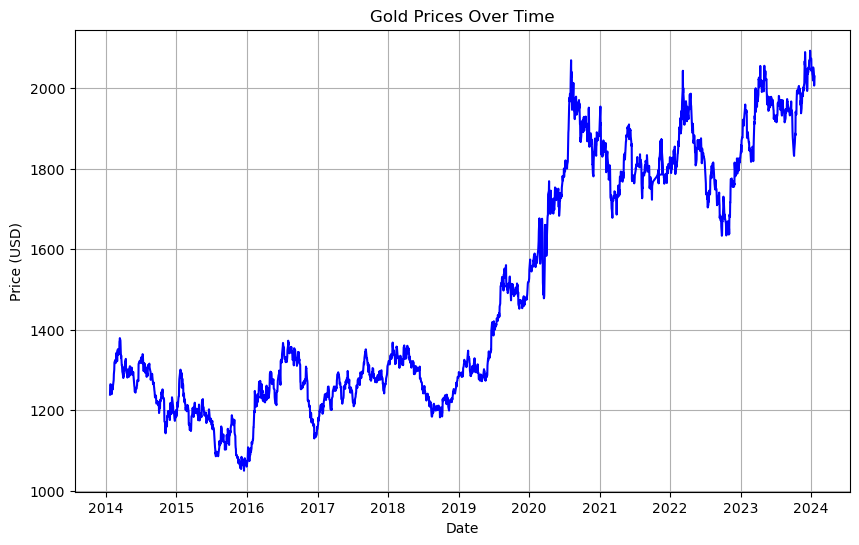

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], color='blue')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

## Step 3: Decompose time series to identify trends and seasonality

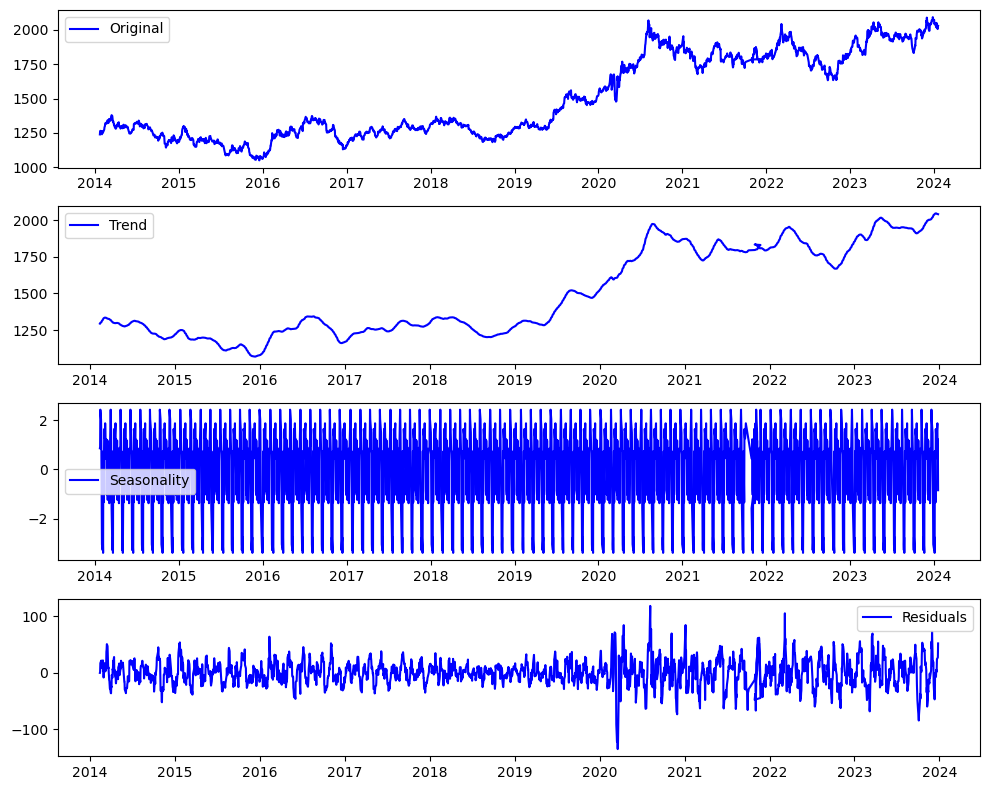

In [9]:
decomposition = seasonal_decompose(data['Close'], model='additive', period=30)  # assuming 30 days in a month
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Step 4: Check for stationarity

In [10]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(data['Close'])

ADF Statistic: -1.7172755789704799
p-value: 0.42223427756672716
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


## Step 5: Model fitting (ARIMA as an example)

In [11]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [12]:
# Define and fit ARIMA model
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\91918\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91918\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91918\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91918\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91918\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2008
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8339.747
Date:                Sun, 18 Feb 2024   AIC                          16691.494
Time:                        19:39:20   BIC                          16725.120
Sample:                             0   HQIC                         16703.838
                               - 2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0232      0.018     -1.312      0.190      -0.058       0.011
ar.L2         -0.0105      0.016     -0.660      0.509      -0.042       0.021
ar.L3          0.0296      0.019      1.574      0.1

In [13]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions

C:\Users\91918\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\91918\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2008    1097.667285
2009    1097.881856
2010    1098.131309
2011    1098.001828
2012    1098.034889
           ...     
2506    1098.027802
2507    1098.027802
2508    1098.027802
2509    1098.027802
2510    1098.027802
Name: predicted_mean, Length: 503, dtype: float64

In [14]:
# Evaluate model
mse = mean_squared_error(test['Close'], predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 18462.501277903786


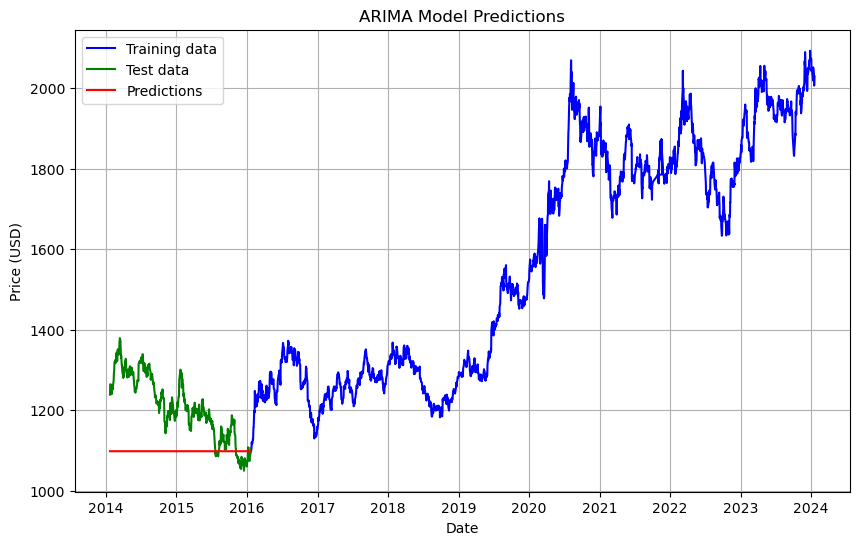

In [15]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], color='blue', label='Training data')
plt.plot(test.index, test['Close'], color='green', label='Test data')
plt.plot(test.index, predictions, color='red', label='Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()